In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train = y_train.reshape(-1,) # Now it got converted to a 1D array
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [38]:
y_train[:5] # 2D Arra

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [42]:
y_train = y_train.reshape

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

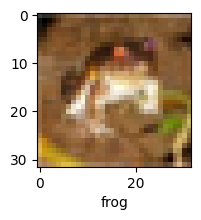

In [7]:
plot_sample(X_train, y_train, 0)

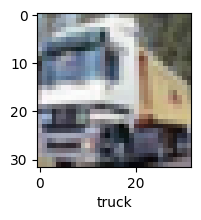

In [8]:
plot_sample(X_train, y_train, 1)

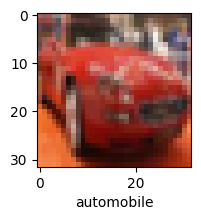

In [9]:
plot_sample(X_train, y_train, 5)

In [10]:
X_train[0].shape

(32, 32, 3)

In [11]:
# Normalizing the pictures

X_train = X_train / 255
X_test = X_test / 255

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8115 - accuracy: 0.3538
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6234 - accuracy: 0.4270
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5403 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4817 - accuracy: 0.4769
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4315 - accuracy: 0.4973


In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.67      0.56      1000
           1       0.57      0.65      0.61      1000
           2       0.48      0.18      0.27      1000
           3       0.38      0.24      0.30      1000
           4       0.47      0.35      0.41      1000
           5       0.54      0.21      0.30      1000
           6       0.43      0.70      0.53      1000
           7       0.43      0.67      0.52      1000
           8       0.59      0.63      0.61      1000
           9       0.54      0.57      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.47     10000
weighted avg       0.49      0.49      0.47     10000



In [14]:
cnn = models.Sequential([

        # cnn 
        layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
        layers.MaxPooling2D((2,2)),
    
        # dense 
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
       
    ])

In [15]:
cnn.compile(optimizer = 'adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 21s 5ms/step - loss: 1.4989 - accuracy: 0.4599
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1270 - accuracy: 0.6054
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9887 - accuracy: 0.6533
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9087 - accuracy: 0.6834
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8483 - accuracy: 0.7043
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7908 - accuracy: 0.7244
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7443 - accuracy: 0.7389
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7007 - accuracy: 0.7554
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6617 - accuracy: 0.7677
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.63

In [16]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9276 - accuracy: 0.6952


[0.9275633692741394, 0.6952000260353088]

In [17]:
y_test = y_test.reshape(-1, )
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

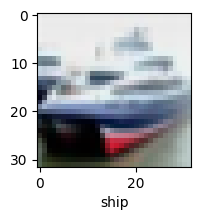

In [18]:
plot_sample(X_test, y_test, 1)

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.09286588e-02, 2.75365323e-06, 1.19083538e-03, 6.37172818e-01,
        7.20822532e-03, 2.39240721e-01, 9.35236216e-02, 1.21231540e-04,
        1.05907572e-02, 2.04383032e-05],
       [1.10638655e-04, 1.06732743e-02, 1.79106053e-06, 3.91540596e-08,
        1.82142074e-07, 8.61663718e-09, 5.95451795e-08, 6.30404218e-09,
        9.83300567e-01, 5.91338938e-03],
       [3.00401449e-01, 2.47044384e-01, 1.91508885e-02, 1.60454225e-03,
        4.50066216e-02, 9.03994893e-04, 5.64807444e-04, 8.81076616e-04,
        1.62555546e-01, 2.21886724e-01],
       [9.38498676e-01, 2.67045870e-02, 7.76749384e-03, 3.69384157e-04,
        4.54264367e-03, 2.44459879e-05, 2.39219909e-04, 4.14324968e-05,
        2.07236782e-02, 1.08850456e-03],
       [1.28255135e-06, 2.62217736e-06, 2.87979841e-03, 1.57953892e-03,
        7.92045534e-01, 1.18359993e-03, 2.02302784e-01, 1.24193264e-06,
        3.19689957e-06, 4.15066410e-07]], dtype=float32)

In [21]:
np.argmax([5,12,1,2]) # It will give the index of the maximum element

1

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

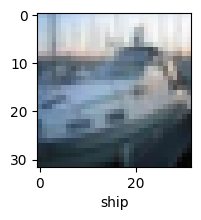

In [29]:
plot_sample(X_test, y_test, 2)

In [28]:
classes[y_classes[2]]

'airplane'

In [30]:
print("Classification report: \n", classification_report(y_test, y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.72      0.74      1000
           1       0.83      0.79      0.81      1000
           2       0.63      0.58      0.60      1000
           3       0.58      0.41      0.49      1000
           4       0.54      0.74      0.63      1000
           5       0.55      0.69      0.61      1000
           6       0.85      0.64      0.73      1000
           7       0.72      0.76      0.74      1000
           8       0.82      0.81      0.81      1000
           9       0.75      0.82      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.70      0.69     10000

